<h1><center><font color='blue'>P2-Investigating a Dataset:</font></center></h1>
<h1><center><font color='blue'>"Challenging Baseball's Popular Beliefs Using Data"</font></center></h1>

For over 100 years, the sport of baseball has produced timeless memories and throughout it's history, many popular beliefs have been passed down from generation to generation about the game. For example, anyone who has followed the sport has heard one tme or another that "pitching wins championships." But does it really? Can an organization really "buy a championship"? My goal for this project is to challenge the validity of baseball's most popular beliefs by analyzing the various data that is available. Hopefully by the end of this investigation we can all have a better insight into which baseball expressions are true or false. 

I have chosen to explore the following baseball expressions:

<a href="#expression1">1.) "Money buys championships."</a><br>
<a href="#expression2">2.) "Money buys talent."</a><br>
<a href="#expression3">3.) "Pitching wins championships."</a><br>
<a href="#expression4">4.) "The best hitters are left-handed."</a><br>

<div id="expression1"><h2><font color= green>1. "Money Buys Championships"</font></h3></div>

To determine if this saying is true or false, I will answer the following questions:<br>

1a.) What is the average team salary of the World Series Champion compared to the league average from 1985-2015?<br>
1b.) How often are the World Series Champion salaries greater than the league average?

<h3>Observation:</h3><br>
The average salary of the league averages from 1985-2016 was 2,054,951. 
<br><br>
The average salary of the World Series champions from 1985-2016 was 2,674,724.
<br><br>
Based on the results, during the 30 year timeframe between 1985-2016, the average salary of the World Series winner was greater than the average league salary a total of 25 times, which translates to 83% of the time. In comparison, the average league salary was only greater than the World Series Champion's a mere 17% of the time, occurring only 5 times.<br><br>

I think it's safe to assume that the teams who spend more money generally have a greater chance of winning the World Series.
<h3>Verdict: <font color='red'>TRUE*</font></h3>

*Although the outcome of my analysis may support the expression, "money buys championships", it may be a bit misleading. For one, I am simply testing whether or not the salary was greater than the league average and while in theory this may seem sufficient, it doesn't necessarily possess strong validation because it doesn't take into consideration the difference between the two. For example, the league average in 2010 was 3,278,746 and the WS Champ was 3,522,904. The WS Champ's salary was greater than that of the league average, but only by about 7%. That 7% should be accounted for somewhere in the analysis to help represent a more thorough investigation. 

Explore the code below to see what was used to analyze the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

<h4>1a.) Find the average salaries from 1985-2016.</h4>

In [28]:
# Check the Salaries dataset for any missing values

salaries = pd.read_csv('Salaries.csv')
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26428 entries, 0 to 26427
Data columns (total 5 columns):
yearID      26428 non-null int64
teamID      26428 non-null object
lgID        26428 non-null object
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [62]:
# Find the average salary of the league from 1985-2016

avg_league_salary = salaries.groupby('yearID')['salary'].mean()
avg_league_salary[2010].mean()

3278746.0

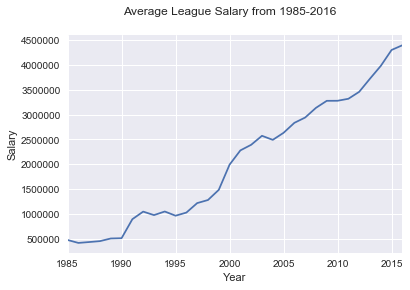

In [56]:
# Plot the league salaries

avg_league_salary.plot()
plt.xlabel('Year')
plt.ylabel('Salary')
plt.suptitle('Average League Salary from 1985-2016')

In [31]:
# Check the Post Season dataset for any missing values

postseason = pd.read_csv('SeriesPost.csv')

postseason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 9 columns):
yearID          316 non-null int64
round           316 non-null object
teamIDwinner    316 non-null object
lgIDwinner      316 non-null object
teamIDloser     316 non-null object
lgIDloser       316 non-null object
wins            316 non-null int64
losses          316 non-null int64
ties            316 non-null int64
dtypes: int64(4), object(5)
memory usage: 22.3+ KB


In [63]:
# Find the average salary of every World Series champion from 1985-2016

wschamps = postseason[(postseason['yearID'] > 1984) & (postseason['round'] == 'WS')]
wschamps.rename(columns={'teamIDwinner':'teamID'}, inplace=True)
wschamps_salary = pd.merge(wschamps, salaries, how='left', on=['yearID','teamID'])
wschamps_avg_salary = wschamps_salary.groupby('yearID')['salary'].mean()
wschamps_avg_salary[2010].mean()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


3522904.75

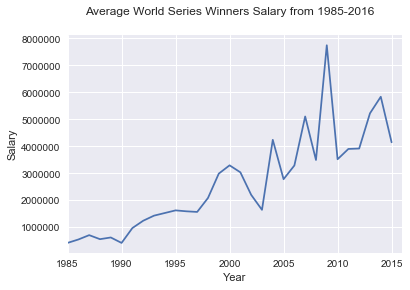

In [58]:
# Plot the World Series winner salaries

wschamps_avg_salary.plot()
plt.xlabel('Year')
plt.ylabel('Salary')
plt.suptitle('Average World Series Winners Salary from 1985-2016')

<h4>1b.) Now that we have the average salaries, let's compare the two.</h4>

In [59]:
# Create a new dataframe that shows a side-by-side comparison of the two averages and then determine how often the 
# World Series Champion salaries were greater than the league averages.

salary_comparison = pd.concat([avg_league_salary, wschamps_avg_salary], axis=1, join='inner')

salary_comparison.columns=['League_Salaries','WS_Salaries']

salary_comparison['Validity'] = np.where((salary_comparison['WS_Salaries']) > (salary_comparison['League_Salaries']), True, False)

salary_comparison.head()

,League_Salaries,WS_Salaries,Validity
yearID,,,
1985,476299,423689.954545,False
1986,417147,549775.500000,True
1987,434729,710833.333333,True
1988,453171,561683.833333,True
1989,506323,624522.800000,True


In [60]:
true_or_false = salary_comparison.loc[1985:2015]['Validity'].value_counts()

Populating the interactive namespace from numpy and matplotlib
True     25
False     5
Name: Validity, dtype: int64


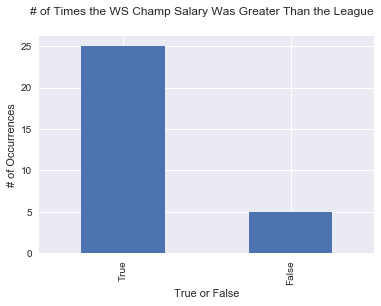

In [98]:
%pylab inline

print (true_or_false)
true_or_false.plot(kind='bar')
plt.suptitle('# of Times the WS Champ Salary Was Greater Than the League')
plt.xlabel('True or False')
plt.ylabel('# of Occurrences')


<div id="expression2"><h2><font color= green>2. "Money buys talent"</font></h3></div>

To determine if this saying is true or false, I will answer the following questions:<br>
2a.) What team has had the most players selected to the All Star game from 1985-2015?<br>
2b.) What is the average salary of those players?<br>
2c.) How do those averages compare to the rest of the league?<br>
2d.) What is the difference between League averages and Yankee averages by year?

<h3>Observation:</h3><br>
From 1985-2015, the team with the most players selected to the All Star game was the New York Yankees with 119 total players. The average salary of those players during that time period was $9,089,748.<br><br>
When comparing their average salary to the rest of the league, you can see a large discrepancy between the two.
<br><br>
Taking into consideration these two points, those results would suggest that the more a franchise spends on the salary of the player, the more talented the players will be. In baseball, the Yankees have always had a reputation of "buying their talent." There may be some truth to that statement afterall.
<br><br>
In conclusion, I would deem the expression "Money buys talent" as TRUE.
<h3>Verdict: <font color='red'>TRUE*</font></h3>

*This is all good and well if everyone agrees that we should base a player's talent level on the ability to make it to the All Star team. But the reality is that not everyone will. This is one limitation to the analysis. 

Another limitation to the analysis is the outliers for the All Star players. In any given season there could be players with exorbitant salaries compared to everyone else. This would result in an inflated overall average for All Star players and create a misrepresentation of the sameple size.  

Explore the code below to see what was used to analyze the data.

<h4>2a.) Find the team with the most All Star game occurrences.</h4>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

allstar_stats = pd.read_csv('AllstarFull.csv', index_col='yearID')
allstar_stats.head()

,playerID,gameNum,gameID,teamID,lgID,GP,startingPos
yearID,,,,,,,
1933,gomezle01,0,ALS193307060,NYA,AL,1.0,1.0
1933,ferreri01,0,ALS193307060,BOS,AL,1.0,2.0
1933,gehrilo01,0,ALS193307060,NYA,AL,1.0,3.0
1933,gehrich01,0,ALS193307060,DET,AL,1.0,4.0
1933,dykesji01,0,ALS193307060,CHA,AL,1.0,5.0


In [64]:
# test the All Star Stats dataset for missing values

allstar_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 1933 to 2016
Data columns (total 7 columns):
playerID       5148 non-null object
gameNum        5148 non-null int64
gameID         5099 non-null object
teamID         5148 non-null object
lgID           5148 non-null object
GP             5129 non-null float64
startingPos    1600 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 321.8+ KB


In [8]:
# Find the team with the most participating players in the Allstar game 
# This should be the team with the most occurrances under the column 'teamID'

team_name = allstar_stats['teamID'].mode()
items_counts = allstar_stats['teamID'].value_counts()
number_of_times = items_counts.max()

def most_occurrences(allstar_stats):
    return (team_name, number_of_times)

most_occurrences(allstar_stats)

(0    NYA
 dtype: object, 421)

Based on this data, the New York Yankees have had the most players selected to the Allstar game, with 421 players.

<h4>2b.) Find the average salary of those players.</h4>

In [9]:
team_salaries = pd.read_csv('Salaries.csv', index_col='yearID')

In [10]:
team_salaries.head()

,teamID,lgID,playerID,salary
yearID,,,,
1985,ATL,NL,barkele01,870000
1985,ATL,NL,bedrost01,550000
1985,ATL,NL,benedbr01,545000
1985,ATL,NL,campri01,633333
1985,ATL,NL,ceronri01,625000


From the "Salaries" dataframe, I noticed the data only started recording as early as 1985 and ended at 2015, so I have to go back and revise my previous calculation and see what team had the most players invited to the Allstar game <b>from 1985-2015</b>.

In [11]:
# filter dataframe to only include data from 1985 and after.

thirtyyears = allstar_stats.loc[1985:2015]

In [12]:
# use new dataframe to find the team that has sent the most players to the Allstar game since 1985.

team_name = thirtyyears['teamID'].mode()
items_counts = thirtyyears['teamID'].value_counts()
number_of_times = items_counts.max()

def most_occurrences(thirtyyears):
    return (team_name, number_of_times)

most_occurrences(thirtyyears)

(0    NYA
 dtype: object, 119)

Based on this data, the New York Yankees still had the most players selected to the Allstar game from 1985-2015, but this time with 119 players.

Now it's time to determine what the average salary of those Allstars were during that time frame. Because the Salaries.csv includes every player from every team since 1985-2015, I have to filter out <b>only the All Stars</b>. I will merge the two dataframes and filter by yearID, playerID, and teamID.

In [13]:
yankee_allstars = thirtyyears.loc[thirtyyears['teamID'] == 'NYA']
yankee_allstars = yankee_allstars.reset_index()
salaries = pd.read_csv('Salaries.csv')
s1 = pd.merge(yankee_allstars, salaries, how='left', on=['yearID', 'playerID', 'teamID'])
s1.salary.mean()

9089748.462184874

The average salary of New York Yankee Allstars, from 1985-2016, is $9,089,748. 

<h4>2c.) How do those averages compare to the rest of the league?</h4>

In [14]:
# find the average salary of all players from 1985-2015

salaries.salary.mean()

2085634.053125473

The average salary of all MLB players, from 1985-2016, is $2,085,634.

In [15]:
avg_salary_year = salaries.groupby('yearID')['salary'].mean()

Populating the interactive namespace from numpy and matplotlib


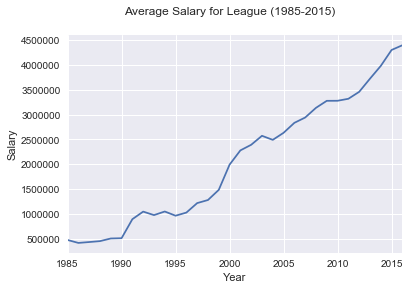

In [16]:
# create a graph that show the average salary of all players from 1985-2015 by year


%pylab inline

avg_salary_year.plot(label="league")
plt.suptitle('Average Salary for League (1985-2015)')
plt.ylabel('Salary')
plt.xlabel('Year')

In [17]:
# create a graph that shows the average salary of NY Yankee Allstars from 1985-2015 by year.

%pylab inline

s1_average = s1.groupby('yearID')['salary'].mean()

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


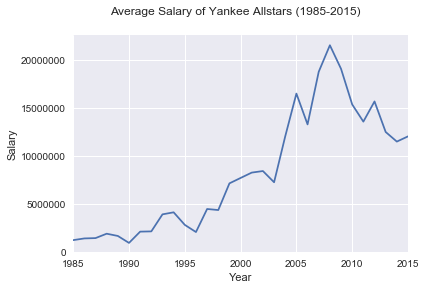

In [18]:
%pylab inline

s1_plot = s1_average.plot(y='salary').ticklabel_format(style='plain')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.suptitle('Average Salary of Yankee Allstars (1985-2015)')

Populating the interactive namespace from numpy and matplotlib


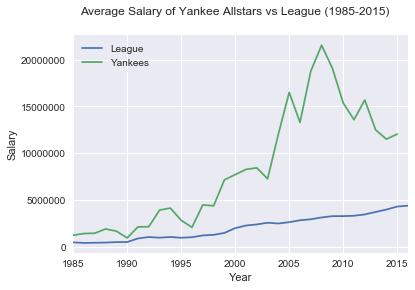

In [19]:
# compare the average salary of the league vs yankee allstars

%pylab inline

avg_salary_year.plot(label='League');s1_average.plot(label='Yankees').ticklabel_format(style='plain')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.suptitle('Average Salary of Yankee Allstars vs League (1985-2015)')
plt.legend(loc='upper left')


Based on the graph above, you can see the discrepancy between the Yankee Allstar average salary per year compared to that of the rest of the league. What can you deduce from this information? One may want to state that the higher the salary, the higher chance of that player having an All Star productive year. 

<h4>2d.) What is the difference between League averages and Yankee averages by year, from 1985-2015?</h4>

In [20]:
# find the standard deviation for yankee allstar average salaries by year and league average salaries by year

std_salaries = pd.concat([avg_salary_year, s1_average], axis=1)

std_salaries.std()

salary    1.278222e+06
salary    6.265775e+06
dtype: float64

In [21]:
std_salaries.head()

,salary,salary
yearID,,
1985,476299,1240234.0
1986,417147,1417303.0
1987,434729,1451342.0
1988,453171,1909550.0
1989,506323,1675000.0


<div id="expression3"><h2><font color= green>3. "Pitching wins championships"</font></h2></div><br>
To determine if this saying is true or false, I will look at the last 10 Championship teams and answer the following questions:<br>
3a.) How do the Championship team's hitting statistics compare to the league during the regular season?<br>
3b.) How do the Championship team's pitching statistics compare to the league during the regular season?<br>

<h3>Observation:</h3><br>

Populating the interactive namespace from numpy and matplotlib


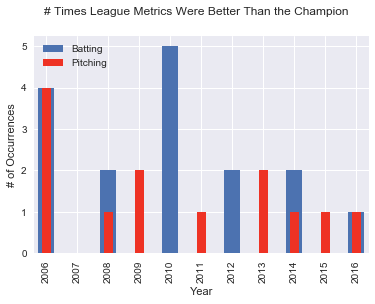

In [99]:
%pylab inline

total.plot(label='Batting', kind='bar', align="center");total_pitching.plot(label='Pitching', kind='bar', align="center", width=.3, color='#EE3224')
#plt.ylabel('Salary')
plt.xlabel('Year')
plt.ylabel('# of Occurrences')
plt.suptitle('# Times League Metrics Were Better Than the Champion')
plt.legend(loc='upper left')

The graph above is illustrating the number of times when the league average for any particular metric, batting or pitching, was better than that of the World Series champion. The higher the number suggests that particular statistic does not have as great of an influence on the outcome of the winner. Let's take a look at the breakdown.

For unique situations:
- There were 2 years when there were occurrences of better league battings metrics and no pitching occurrences. This would suggest that batting had less of an influence on the outcome of the game compared to pitching.
- There were 4 years when there were occurrences of better league pitching metrics and no batting occurrences. This suggests that pitching had less of an influence on the outcome of the game compared to batting.


For shared situations:
- There were 4 years when there were occurrences of better league metrics for batting and pitching.
- Out of the 4, there were 2 years that were even and two years where pitching had less occurrences; therefore, pitching had more of influence on the outcome. 
- There was also 1 year when there were no occurrences for either batting or pitching metrics.


So far it is hard to make a determination whether or not pitching or batting has more of an impact on the outcome of the World Series winner. 

If I breakdown each year and give a point to the baseball stat that had the least amount of occurrences (ties are not counted), the result ends up as:

Batting: 4
Pitching: 4

A TIE!!

Based on the results, it's difficult to definitively say that "pitching wins championships" is either true or false. 
<h3>Verdict: <font color='red'>INCONCLUSIVE*</font></h3>

*One thing that was not explored in the analysis was the batting and pitching statistics during the playoffs. In sports there is an increased level of pressure as the stakes of the games are higher. This usually results in different statistical averages. It would be interesting to analyze the same metrics, but during the playoffs. The results of that analysis could sway the verdict to either side. 



Explore the code below to see what was used to analyze the data.

<h4>3a.) Compare the Championship team's hitting statistics to the rest of the league from 2006-2016.</h4>

In [66]:
team_stats = pd.read_csv('Teams.csv')
batting_stats = pd.read_csv('Batting.csv')`

In [90]:
# check the team stats dataset for missing values

team_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 48 columns):
yearID            2835 non-null int64
lgID              2785 non-null object
teamID            2835 non-null object
franchID          2835 non-null object
divID             1318 non-null object
Rank              2835 non-null int64
G                 2835 non-null int64
Ghome             2436 non-null float64
W                 2835 non-null int64
L                 2835 non-null int64
DivWin            1290 non-null object
WCWin             654 non-null object
LgWin             2807 non-null object
WSWin             2478 non-null object
R                 2835 non-null int64
AB                2835 non-null int64
H                 2835 non-null int64
2B                2835 non-null int64
3B                2835 non-null int64
HR                2835 non-null int64
BB                2835 non-null int64
SO                2715 non-null float64
SB                2691 non-null float64
CS    

In [91]:
# check the batting stats for missing values

batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 23 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
BA          87435 non-null float64
dtypes: float64(10), int64(10), object(3)
memory usage: 18.0+ MB


In [67]:
'''All calculations represent the league as a whole by year.'''
# calculate the average runs
# calculate the average hits
# calculate the batting average 
# calculate the average on-base percentage
# calculate the average slugging percentage
# calculate the on--base plus slugging percentage

avg_runs = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['R'].mean()
avg_hits = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['H'].mean()
avg_batting = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['H'].sum() / team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['AB'].sum()
avg_obp = (team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['H'].sum() + team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['BB'].sum() + team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['HBP'].sum()) / team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['AB'].sum()
avg_slg = (team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['H'].sum() + team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['2B'].sum() + (team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['3B'].sum() * 2) + (team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['HR'].sum() * 3)) / team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['AB'].sum()
avg_ops = avg_obp + avg_slg

league_bat_metrics = pd.concat([avg_runs, avg_hits, avg_batting, avg_obp, avg_slg, avg_ops], axis=1)
league_bat_metrics.columns = ['Avg Runs', 'Avg Hits', 'Bat Avg', 'Avg OBP', 'Avg Slg', 'Avg OPS']

In [68]:
# create a list of the World Series winners from 2006-2016

wschamps_10yr = postseason[(postseason['yearID'] > 2005) & (postseason['round'] == 'WS')]
wschamps_10yr.rename(columns={'teamIDwinner':'teamID'}, inplace=True)
#wschamps_10yr

C:\Anaconda\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [69]:
# use the list of World Series winners and filter those team's batting statistics

champ_bat_metrics = pd.merge(team_stats, wschamps_10yr, how='right', on=['yearID','teamID']).set_index('yearID')
def batting_average(H, AB):
    return H / AB
def onbase_perc(H, BB, HBP, AB):
    return (H+BB+HBP) / AB
def slg_perc(H, Doubles, Triples, HR, AB):
    return (H+Doubles+(Triples*2)+(HR*3)) / AB
def ops_perc(H, Doubles, Triples, HR, AB, BB, HBP):
    return ((H+BB+HBP) / AB) + ((H+Doubles+(Triples*2)+(HR*3)) / AB)

champ_bat_metrics['BA'] = batting_average(champ_bat_metrics['H'], champ_bat_metrics['AB'])
champ_bat_metrics['OBP'] = onbase_perc(champ_bat_metrics['H'],champ_bat_metrics['BB'],champ_bat_metrics['HBP'],champ_bat_metrics['AB'])
champ_bat_metrics['SLG'] = slg_perc(champ_bat_metrics['H'],champ_bat_metrics['2B'],champ_bat_metrics['3B'],champ_bat_metrics['HR'],champ_bat_metrics['AB'])
champ_bat_metrics['OPS'] = ops_perc(champ_bat_metrics['H'],champ_bat_metrics['2B'],champ_bat_metrics['3B'],champ_bat_metrics['HR'],champ_bat_metrics['AB'],champ_bat_metrics['BB'],champ_bat_metrics['HBP'])

# old - ws_winners = champ_bat_metrics[['teamID', 'R', 'H', 'BA', 'OBP', 'SLG', 'OPS']]
ws_winners = champ_bat_metrics[['R', 'H', 'BA', 'OBP', 'SLG', 'OPS']]


In [70]:
# merge the league statistics and winners statistics into one dataframe and compare the two sets

winners_vs_league = pd.merge(league_bat_metrics, ws_winners, right_index=True, left_index=True)
winners_vs_league.rename(columns={'teamID':'WS Winner'}, inplace=True)
#winners_vs_league[['WS Winner','R','Avg Runs','H','Avg Hits','BA','Bat Avg','OBP','Avg OBP','SLG','Avg Slg','OPS','Avg OPS']]
winners_vs_league[['Avg Runs','R','Avg Hits','H','Bat Avg','BA','Avg OBP','OBP','Avg Slg','SLG','Avg OPS','OPS']]

,Avg Runs,R,Avg Hits,H,Bat Avg,BA,Avg OBP,OBP,Avg Slg,SLG,Avg OPS,OPS
yearID,,,,,,,,,,,,
2006,786.633333,781,1502.433333,1484,0.269348,0.268743,0.374905,0.375951,0.431873,0.431365,0.806778,0.807316
2007,777.400000,867,1499.233333,1561,0.268066,0.279299,0.374359,0.414028,0.422695,0.443908,0.797053,0.857935
2008,752.833333,799,1465.733333,1407,0.263757,0.255400,0.371780,0.373934,0.416234,0.437829,0.788014,0.811763
2009,747.300000,915,1450.800000,1604,0.262431,0.283392,0.372230,0.410071,0.417760,0.477562,0.789990,0.887633
2010,710.266667,697,1418.466667,1411,0.257352,0.257106,0.362140,0.354956,0.402841,0.408345,0.764982,0.763302
2011,693.600000,762,1408.900000,1513,0.255074,0.273500,0.355083,0.379429,0.399010,0.424982,0.754093,0.804411
2012,700.566667,718,1402.100000,1495,0.254540,0.268982,0.352591,0.361101,0.405323,0.396725,0.757914,0.757827
2013,675.166667,853,1403.100000,1566,0.253465,0.277119,0.350870,0.392674,0.396471,0.446116,0.747341,0.838790
2014,658.700000,665,1386.500000,1407,0.251156,0.254753,0.345786,0.339852,0.386368,0.388195,0.732154,0.728046


In [71]:
# create boolean columns that check all the instances where the league average was greater than the World Series winner of 
# that year

winners_vs_league['Runs_Checker'] = np.where((winners_vs_league['Avg Runs']) > (winners_vs_league['R']), True, False)
winners_vs_league['Hits_Checker'] = np.where((winners_vs_league['Avg Hits']) > (winners_vs_league['H']), True, False)
winners_vs_league['Bat_Avg_Checker'] = np.where((winners_vs_league['Bat Avg']) > (winners_vs_league['BA']), True, False)
winners_vs_league['OBP_Checker'] = np.where((winners_vs_league['Avg OBP']) > (winners_vs_league['OBP']), True, False)
winners_vs_league['Slg_Checker'] = np.where((winners_vs_league['Avg Slg']) > (winners_vs_league['SLG']), True, False)
winners_vs_league['OPS_Checker'] = np.where((winners_vs_league['Avg OPS']) > (winners_vs_league['OPS']), True, False)

winners_vs_league['Total'] = winners_vs_league.select_dtypes(include=['bool']).sum(axis=1)
total = winners_vs_league.select_dtypes(include=['bool']).sum(axis=1)


Populating the interactive namespace from numpy and matplotlib


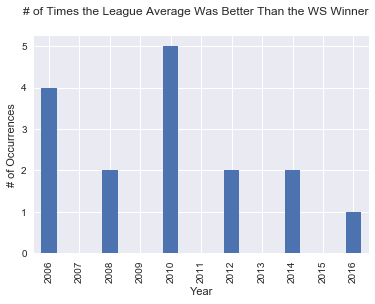

In [100]:
%pylab inline

total.plot(kind='bar')
plt.suptitle('# of Times the League Average Was Better Than the WS Winner')
plt.xlabel('Year')
plt.ylabel('# of Occurrences')


<h4>3b.) Compare the Championship team's batting statistics to the rest of the league from 2006-2016.</h4>

In [73]:
team_stats = pd.read_csv('Teams.csv')
pitching_stats = pd.read_csv('Pitching.csv')

In [74]:
'''All calculations represent the league as a whole by year.'''
# calculate the runs allowed
# calculate the earned run average
# calculate the WHIP (walks and hits per inning pitched)
# calculate the strikeout average
# calculate the saves average
# calculate the Home Runs Allowed average

avg_ra = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['RA'].mean()
avg_era = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['ERA'].mean()
avg_whip = ((team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['HA'].sum()) + (team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['BBA'].sum())) / 43740
avg_strikeout = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['SOA'].mean()
avg_saves = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['SV'].mean()
avg_hr_allowed = team_stats.loc[(team_stats['yearID'] <= 2016) & (team_stats['yearID'] >= 2006)].groupby('yearID')['HRA'].mean()

league_pitch_metrics = pd.concat([avg_ra, avg_era, avg_whip, avg_strikeout, avg_saves, avg_hr_allowed], axis=1)
league_pitch_metrics.columns = ['Avg RA', 'Avg ERA', 'Avg WHIP', 'Avg Strikeout', 'Avg Saves', 'Avg HR Allowed']

In [75]:
# use the list of World Series winners and filter those team's pitching statistics

champ_pitching_metrics = pd.merge(team_stats, wschamps_10yr, how='right', on=['yearID','teamID']).set_index('yearID')
def whip(HA, BBA):
    return (HA + BBA)/1458

champ_pitching_metrics['WHIP'] = whip(champ_pitching_metrics['HA'], champ_pitching_metrics['BBA'])

ws_winners_pitching = champ_pitching_metrics[['RA', 'ERA', 'WHIP', 'SOA', 'SV', 'HRA']]

In [76]:
# merge the league statistics and winners statistics into one dataframe and compare the two sets

winners_vs_league_pitching = pd.merge(league_pitch_metrics, ws_winners_pitching, right_index=True, left_index=True)
winners_vs_league_pitching.rename(columns={'teamID':'WS Winner'}, inplace=True)
#winners_vs_league[['WS Winner','R','Avg Runs','H','Avg Hits','BA','Bat Avg','OBP','Avg OBP','SLG','Avg Slg','OPS','Avg OPS']]
winners_vs_league_pitching[['Avg RA', 'Avg ERA', 'Avg WHIP', 'Avg Strikeout', 'Avg Saves', 'Avg HR Allowed', 'RA', 'ERA', 'WHIP', 'SOA', 'SV', 'HRA']]

,Avg RA,Avg ERA,Avg WHIP,Avg Strikeout,Avg Saves,Avg HR Allowed,RA,ERA,WHIP,SOA,SV,HRA
yearID,,,,,,,,,,,,
2006,786.633333,4.521667,1.392775,1055.166667,40.033333,179.533333,762,4.54,1.357339,970,38,193
2007,777.400000,4.462667,1.395885,1072.966667,39.933333,165.233333,657,3.87,1.256516,1149,45,151
2008,752.833333,4.316667,1.378807,1096.133333,39.466667,162.600000,680,3.88,1.355967,1081,47,160
2009,747.300000,4.314000,1.375034,1119.700000,40.066667,168.066667,753,4.26,1.344307,1260,51,181
2010,710.266667,4.073333,1.333608,1143.533333,40.133333,153.766667,583,3.36,1.273663,1331,57,134
2011,693.600000,3.936667,1.309671,1149.600000,41.433333,151.733333,692,3.74,1.309328,1098,47,136
2012,700.566667,4.009333,1.297942,1214.200000,42.033333,164.466667,649,3.68,1.268861,1237,53,142
2013,675.166667,3.863333,1.297051,1223.666667,42.200000,155.366667,656,3.79,1.296296,1294,33,156
2014,658.700000,3.738000,1.271491,1248.033333,42.133333,139.533333,614,3.50,1.161866,1211,46,133


In [77]:
# create boolean columns that check all the instances where the league average was greater than the World Series winner of 
# that year

winners_vs_league_pitching['RA_Checker'] = np.where((winners_vs_league_pitching['Avg RA']) < (winners_vs_league_pitching['RA']), True, False)
winners_vs_league_pitching['ERA_Checker'] = np.where((winners_vs_league_pitching['Avg ERA']) < (winners_vs_league_pitching['ERA']), True, False)
winners_vs_league_pitching['WHIP_Checker'] = np.where((winners_vs_league_pitching['Avg WHIP']) < (winners_vs_league_pitching['WHIP']), True, False)
winners_vs_league_pitching['SOA_Checker'] = np.where((winners_vs_league_pitching['Avg Strikeout']) > (winners_vs_league_pitching['SOA']), True, False)
winners_vs_league_pitching['SV_Checker'] = np.where((winners_vs_league_pitching['Avg Saves']) > (winners_vs_league_pitching['SV']), True, False)
winners_vs_league_pitching['HRA_Checker'] = np.where((winners_vs_league_pitching['Avg HR Allowed']) < (winners_vs_league_pitching['HRA']), True, False)

winners_vs_league_pitching['Total'] = winners_vs_league_pitching.select_dtypes(include=['bool']).sum(axis=1)
total_pitching = winners_vs_league_pitching.select_dtypes(include=['bool']).sum(axis=1)

Populating the interactive namespace from numpy and matplotlib


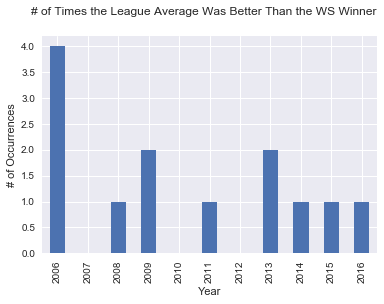

In [101]:
%pylab inline

total_pitching.plot(kind='bar')
plt.suptitle('# of Times the League Average Was Better Than the WS Winner')
plt.xlabel('Year')
plt.ylabel('# of Occurrences')


Populating the interactive namespace from numpy and matplotlib


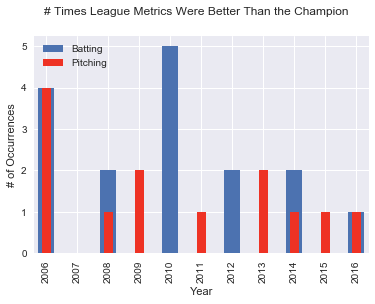

In [102]:
%pylab inline

total.plot(label='Batting', kind='bar', align="center");total_pitching.plot(label='Pitching', kind='bar', align="center", width=.3, color='#EE3224')
#plt.ylabel('Salary')
plt.xlabel('Year')
plt.ylabel('# of Occurrences')
plt.suptitle('# Times League Metrics Were Better Than the Champion')
plt.legend(loc='upper left')


<div id="expression4"><h2><font color= green>4. "The Best Hitters Are Left Handed"</font></h2></div><br>
To determine if this saying is true or false, I will explore the following questions based on the past 10 years:<br>
4a.) What handed batters finished in the top 10 in Batting Average?<br>
4b.) What handed batters finished in the top 10 in Home Runs?<br>
4c.) What handed batters finished in the top 10 in RBIs?<br>
4d.) What handed batters finished in the top 10 in Hits?

<h3>Observation:</h3><br>
Out of the 4 different hitting metrics that we accounted for - Batting Average(BA), Home Runs(HR), Runs Batted In(RBI), and Hits(H) - during the last 10 years, right-handed hitters finished in the top-10 of each category almost twice as often as left-handed hitters. This may be due to the fact that left-handed hitters only account for about 25% of MLB players. Either way, the results of the investigation suggest that right-handed batters are the better hitters. 
<h3>Verdict: <font color='red'>FALSE*</font></h3>

*Although analyzing the top-10 players for each batting statistic may have been the more thorough approach, it would still have been interesting to see the leader in each metric. If a left-handed hitter finished at the top of each analyzed metric, would that be enough to sway the verdict in the other direction? 

To some statisticians, a player's slugging percentage is a more accurate representation of how well a player is hitting. That being said, it may have been worth while to include that in the set of metrics that were analyzed. Excluding it from the research may be a shortcoming of trying to prove whether or not the expression is true or false.

Explore the code below to see what was used to analyze the data.

In [96]:
# starting with the original code from your first post
batting_stats = pd.read_csv('Batting.csv')
master_info = pd.read_csv('Master.csv')

def batting_average(H, AB):
    return H / AB

batting_stats['BA'] = batting_average(batting_stats['H'], batting_stats['AB'])
batting_stats.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'BA'],
      dtype='object')

In [95]:
#check batting stats for missing values

batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 23 columns):
playerID    102816 non-null object
yearID      102816 non-null int64
stint       102816 non-null int64
teamID      102816 non-null object
lgID        102079 non-null object
G           102816 non-null int64
AB          102816 non-null int64
R           102816 non-null int64
H           102816 non-null int64
2B          102816 non-null int64
3B          102816 non-null int64
HR          102816 non-null int64
RBI         102392 non-null float64
SB          101516 non-null float64
CS          79360 non-null float64
BB          102816 non-null int64
SO          94978 non-null float64
IBB         66251 non-null float64
HBP         100006 non-null float64
SH          96478 non-null float64
SF          66782 non-null float64
GIDP        76706 non-null float64
BA          87435 non-null float64
dtypes: float64(10), int64(10), object(3)
memory usage: 18.0+ MB


In [97]:
# check the master info dataset for missing values

master_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19105 entries, 0 to 19104
Data columns (total 24 columns):
playerID        19105 non-null object
birthYear       18973 non-null float64
birthMonth      18803 non-null float64
birthDay        18656 non-null float64
birthCountry    19036 non-null object
birthState      18534 non-null object
birthCity       18925 non-null object
deathYear       9441 non-null float64
deathMonth      9440 non-null float64
deathDay        9439 non-null float64
deathCountry    9436 non-null object
deathState      9390 non-null object
deathCity       9431 non-null object
nameFirst       19068 non-null object
nameLast        19105 non-null object
nameGiven       19068 non-null object
weight          18251 non-null float64
height          18320 non-null float64
bats            17920 non-null object
throws          18126 non-null object
debut           18910 non-null object
finalGame       18910 non-null object
retroID         19049 non-null object
bbrefID        

In [82]:
batting_stats_info = pd.merge(batting_stats, master_info, how='left', on=['playerID'])
top_10 = batting_stats_info.loc[(batting_stats_info['yearID'] <= 2016) & (batting_stats_info['yearID'] >= 2006)]
most_hr = top_10.groupby('yearID')['HR'].apply(lambda grp: grp.nlargest(10))

# flatten and extract index
most_hr_indices= most_hr.reset_index().level_1

# extract rows from top_10 that match indices
extracted_rows=  most_hr_indices.apply(lambda x: top_10.loc[x][['bats','yearID']])

# cross tabulate 
bats_counts_hr= pd.crosstab(extracted_rows.bats, extracted_rows.yearID, margins= True)

In [83]:
bats_counts_hr

yearID,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
bats,,,,,,,,,,,,
B,2,1,0,1,1,1,0,0,1,0,0,7
L,4,6,3,5,4,2,4,3,2,3,1,37
R,4,3,7,4,5,7,6,7,7,7,9,66
All,10,10,10,10,10,10,10,10,10,10,10,110


In [84]:
batting_stats_info = pd.merge(batting_stats, master_info, how='left', on=['playerID'])
top_10 = batting_stats_info.loc[(batting_stats_info['yearID'] <= 2016) & (batting_stats_info['yearID'] >= 2006)]
most_rbi = top_10.groupby('yearID')['RBI'].apply(lambda grp: grp.nlargest(10))

# flatten and extract index
most_rbi_indices= most_rbi.reset_index().level_1

# extract rows from top_10 that match indices
extracted_rows=  most_rbi_indices.apply(lambda x: top_10.loc[x][['bats','yearID']])

# cross tabulate 
bats_counts_rbi= pd.crosstab(extracted_rows.bats, extracted_rows.yearID, margins= True)

In [85]:
bats_counts_rbi

yearID,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
bats,,,,,,,,,,,,
B,1,0,0,1,0,1,1,0,1,1,0,6
L,4,3,5,3,3,5,3,6,2,2,2,38
R,5,7,5,6,7,4,6,4,7,7,8,66
All,10,10,10,10,10,10,10,10,10,10,10,110


In [86]:
batting_stats_info = pd.merge(batting_stats, master_info, how='left', on=['playerID'])
top_10 = batting_stats_info.loc[(batting_stats_info['yearID'] <= 2016) & (batting_stats_info['yearID'] >= 2006)]
most_hits = top_10.groupby('yearID')['H'].apply(lambda grp: grp.nlargest(10))

# flatten and extract index
most_hits_indices= most_hits.reset_index().level_1

# extract rows from top_10 that match indices
extracted_rows=  most_hits_indices.apply(lambda x: top_10.loc[x][['bats','yearID']])

# cross tabulate 
bats_counts_hits= pd.crosstab(extracted_rows.bats, extracted_rows.yearID, margins= True)

In [87]:
bats_counts_hits

yearID,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
bats,,,,,,,,,,,,
B,1,1,1,1,0,1,0,0,1,0,0,6
L,3,2,4,3,5,3,2,4,4,3,2,35
R,6,7,5,6,5,6,8,6,5,7,8,69
All,10,10,10,10,10,10,10,10,10,10,10,110


In [88]:
batting_stats_info = pd.merge(batting_stats, master_info, how='left', on=['playerID'])
top_10 = batting_stats_info.loc[(batting_stats_info['yearID'] <= 2016) & (batting_stats_info['yearID'] >= 2006)]
most_ba = top_10.groupby('yearID')['BA'].apply(lambda grp: grp.nlargest(10))

# flatten and extract index
most_ba_indices= most_ba.reset_index().level_1

# extract rows from top_10 that match indices
extracted_rows=  most_ba_indices.apply(lambda x: top_10.loc[x][['bats','yearID']])

# cross tabulate 
bats_counts_ba= pd.crosstab(extracted_rows.bats, extracted_rows.yearID, margins= True)

In [89]:
bats_counts_ba

yearID,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,All
bats,,,,,,,,,,,,
B,0,1,0,3,2,0,1,0,0,2,1,10
L,4,1,2,3,3,4,0,6,3,2,4,32
R,6,8,8,4,5,6,9,4,7,6,5,68
All,10,10,10,10,10,10,10,10,10,10,10,110


<h2>Resources Used for this Project:

https://discussions.udacity.com/t/using-nlargest-and-groupby/247062/7